In [114]:
from torchvision.io import read_image
import torchvision.transforms as T
import monai.transforms as MT
import torch
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt


torch.Size([1, 544, 301])
tensor([[[0.0039, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.3255, 0.3373, 0.3765,  ..., 0.2235, 0.2314, 0.2667],
         [0.3529, 0.3569, 0.3922,  ..., 0.3176, 0.3451, 0.3529],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039]]])
torch.float32


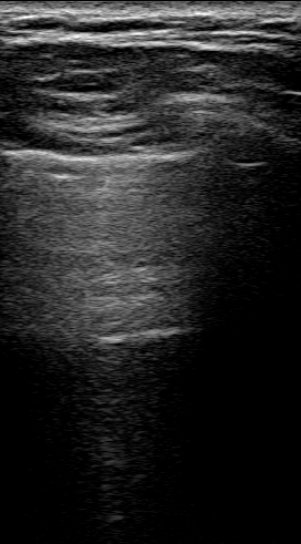

In [115]:
image = read_image('testing_image.png') / 255
print(image.shape)
print(image)
print(image.dtype)
T.ToPILImage()(image)

In [49]:

for std in [0.0001,0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0]:
    transform = MT.RandGaussianNoise(prob=1.0, mean=0, std=std)
    transformed = transform(image)
    a =  T.ToPILImage()(transformed)
    a.show()
    

# Single 11 augmentations

### Shear [-15°, 15°], x,y axis

tensor(118748)


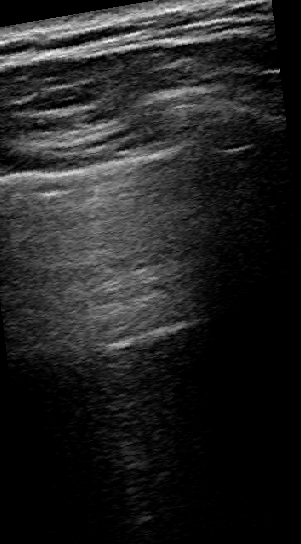

In [133]:


transform = T.RandomApply([T.RandomAffine(degrees=0, shear=(-15, 15, -15, 15))], p=0.5)

tensor_image = image
tensor_transformed_image = transform(image)


difference = torch.sum(tensor_image != tensor_transformed_image)
print(difference)

T.ToPILImage()(tensor_transformed_image)

### Translate [-0.15, 0.15], x,y axis

tensor(114886)


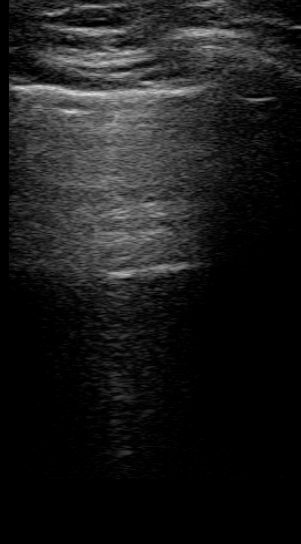

In [132]:
transform = T.RandomApply([T.RandomAffine(degrees=0, translate=(0.15, 0.15))], p=0.5)

tensor_image = image
tensor_transformed_image = transform(image)


difference = torch.sum(tensor_image != tensor_transformed_image)
print(difference)

T.ToPILImage()(tensor_transformed_image)

### Rotate [-25°, 25°]

tensor(0)


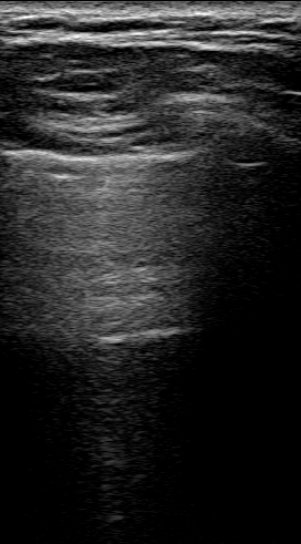

In [99]:
transform = T.RandomApply([T.RandomAffine(degrees=(-25, 25)) ],  p=0.5)

tensor_image = image
tensor_transformed_image = transform(image)


difference = torch.sum(tensor_image != tensor_transformed_image)
print(difference)

T.ToPILImage()(tensor_transformed_image)

### Noise I = I + (rand(size(I)) − FV) × N
I = image
N = noise (mean=0, variance from the image)
FV = 0.3/0.4/0.5

Grayscale
Grayscale like on the paper

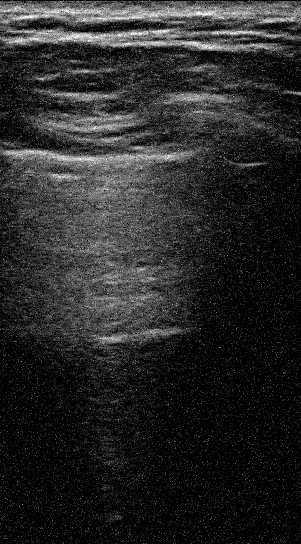

In [116]:
class NoiseWithFV(object):
    def __init__(self, FV):
        self.FV = FV
        
    def __call__(self, image):
        
        variance = torch.var(image)
        
        # Generate noise by gaussian distribution == normal distribution
        noise = np.random.normal(0, np.sqrt(variance), image.shape)
        
        d0, d1, d2 = image.shape
        
        image_noise = image + (np.random.rand(d0, d1, d2) - self.FV) * noise
        
        # Clip values to ensure they are within [0, 1]
        image_noise = torch.clamp(image_noise, 0, 1)
        return image_noise
    
FV = [0.3, 0.4, 0.5]

transform = NoiseWithFV(0.1)
transformed_image = transform(image)
T.ToPILImage()(transformed_image)

### Salt and Pepper noise
with 3 density values (0.01, 0.02, and 0.03)

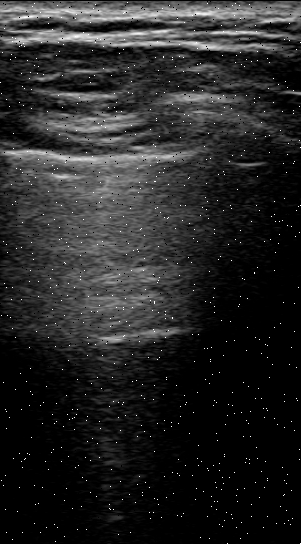

In [128]:
class SaltAndPepperNoise(object):
    def __init__(self, density):
        self.density = density
        
    def __call__(self, image):
        
        image_copy = image.clone()
        
        # Generate random matrix
        rand_matrix = torch.rand(image.size())
        
        # Create salt & pepper mask
        salt_mask = (rand_matrix < (self.density / 2))
        pepper_mask = (rand_matrix > 1 - (self.density / 2))
        
        # Apply masks to image
        image_copy[salt_mask] = 1
        image_copy[pepper_mask] = 0
        
        return image_copy


density = [0.01, 0.02, 0.03]

transform = SaltAndPepperNoise(density=0.01)
transformed_image = transform(image)
T.ToPILImage()(transformed_image)

### Flip (horizontal, vertical)

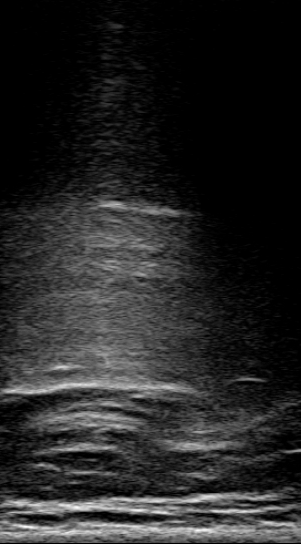

In [130]:
transform = T.RandomVerticalFlip(p=1.0)
transformed_image = transform(image)

T.ToPILImage()(transformed_image)

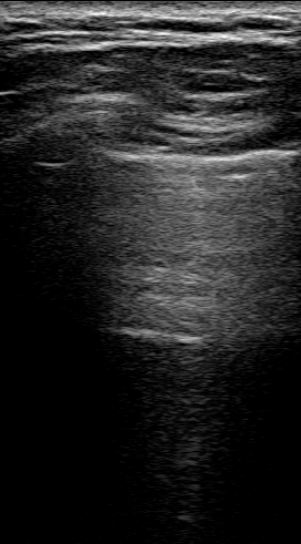

In [131]:
transform = T.RandomHorizontalFlip(p=1.0)
transformed_image = transform(image)

T.ToPILImage()(transformed_image)

### Zoom in/out [0.8, 1.2]

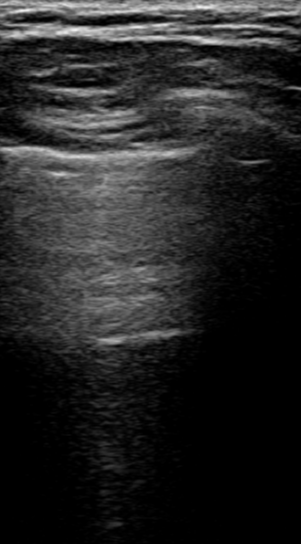

In [182]:
transform = MT.RandZoom(prob=1.0, min_zoom=0.8, max_zoom=1.2)
transformed_image = transform(image)

T.ToPILImage()(transformed_image)

### Random crop

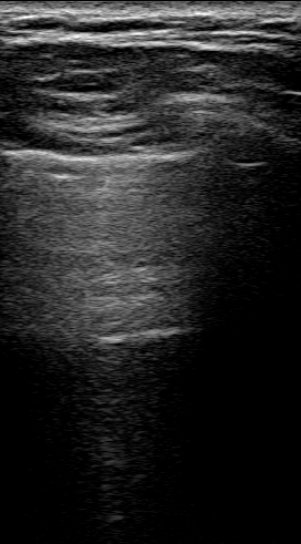

In [211]:
transform = T.RandomResizedCrop(size=(544, 301), scale=(0.8, 1.0), ratio=(0.1, 1), antialias=True)

transformed_image = transform(image)

T.ToPILImage()(transformed_image)